# Image processing

Le immagini possono essere trattate sia con operazioni aritmetiche sia con operazioni di trasformazione più complesse.

In [6]:
# import delle librerie
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# in questa folder sono memorizzati alcuni file a supporto (path relativo al notebook corrente)
IMGSRC = 'data'

def myResourcePath(fname):
    filename = os.path.join(IMGSRC, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename

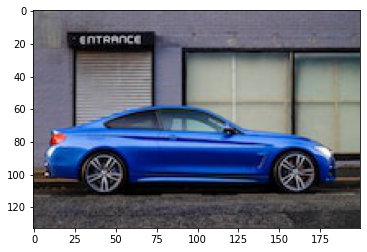

In [7]:
image = Image.open(myResourcePath('car.jpg'))

plt.imshow(image, cmap='gray');

Carichiamo l'immagine in B/N

Utilizziamo una funzione specifica di PIL

Info: <https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.Image.convert>

shape = (133, 200)


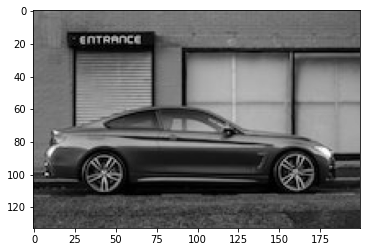

In [8]:
from scipy import misc

image = Image.open(myResourcePath('car.jpg')).convert('L')

plt.imshow(image, cmap='gray')

image_array = np.array(image)
print(f'shape = {image_array.shape}')

Il codice seguente effettua tre operazioni

1. converte tutti i pixel nelle righe [40:50] nel colore bianco
2. con una maschera imposta i pixel al valore nero
3. aggiunge una linea bianca (obliqua)

Nota sul metodo ogrid 

An instance of numpy.lib.index_tricks.nd_grid which returns an open (i.e. not fleshed out) mesh-grid when indexed, so that only one dimension of each returned array is greater than 1. The dimension and number of the output arrays are equal to the number of indexing dimensions.

X = (133, 1)
Y = (1, 200)


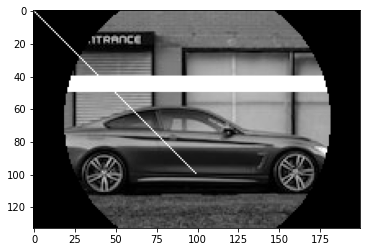

In [9]:
# Slicing
img = image_array.copy()

img[40:50] = 255

# Masks
lx, ly = img.shape
X, Y = np.ogrid[0:lx, 0:ly]
print(f'X = {X.shape}')
print(f'Y = {Y.shape}')

mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4

img[mask] = 0

# Fancy indexing
img[range(100), range(100)] = 255

plt.imshow(img, cmap='gray')

mask shape is (133, 200)


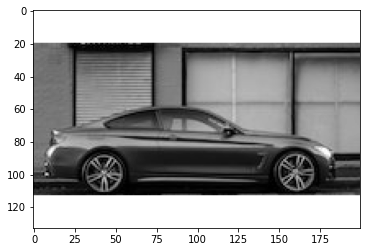

In [10]:
# MASK
img = image_array.copy()

lx, ly = img.shape

mask = np.full((lx, ly), False)
mask[range(0, 20), :] = True
mask[range(lx - 20, lx), :] = True

print(f'mask shape is {mask.shape}')

img[mask] = 255

plt.imshow(img, cmap='gray')

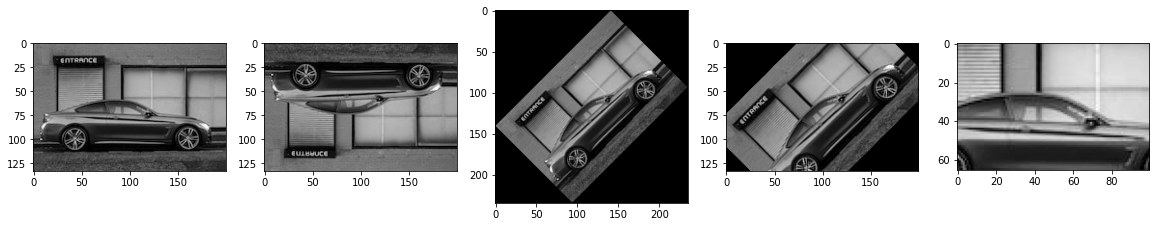

In [14]:
from scipy import ndimage

img = image_array.copy()

lx, ly = img.shape
# Cropping by left-upper point and bottom-right point
crop_face = img[lx // 4: - lx // 4, ly // 4: - ly // 4]

# up <-> down flip
flip_ud_img = np.flipud(img)

# rotation
rotate_img = ndimage.rotate(img, 45)
rotate_img_noreshape = ndimage.rotate(img, 45, reshape=False)

plt.figure(figsize=(20, 12))
plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 5, 2)
plt.imshow(flip_ud_img, cmap='gray')
plt.subplot(1, 5, 3)
plt.imshow(rotate_img, cmap='gray')
plt.subplot(1, 5, 4)
plt.imshow(rotate_img_noreshape, cmap='gray')
plt.subplot(1, 5, 5)
plt.imshow(crop_face, cmap='gray');

## Blurring/smoothing

Filtro gaussiano vs filtro uniforme 

### filtro gaussiano
**sigma** Standard deviation for Gaussian kernel. The standard deviations of the Gaussian filter are given for each axis as a sequence, or as a single number, in which case it is equal for all axes.

### filtro uniforme
**size** The sizes of the uniform filter are given for each axis as a sequence, or as a single number, in which case the size is equal for all axes.

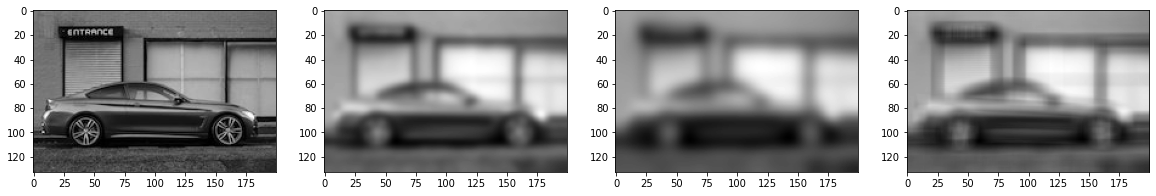

In [15]:
img = image_array.copy()

blurred_image = ndimage.gaussian_filter(img, sigma=3)
very_blurred = ndimage.gaussian_filter(img, sigma=5)
local_mean = ndimage.uniform_filter(img, size=11)

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(blurred_image, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(very_blurred, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(local_mean, cmap='gray');

## Sharpening

Appligando un filtro gaussiano ottengo una riduzione di definizione. Posso fare il contrario?

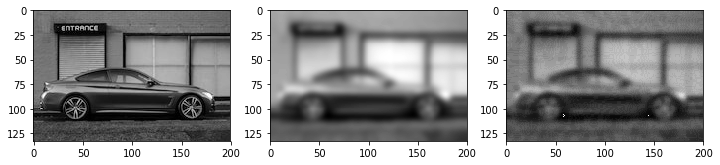

In [7]:
img = image_array.copy()

blurred_image = ndimage.gaussian_filter(img, sigma=3)

filter_blurred = ndimage.gaussian_filter(blurred_image, sigma=1)

alpha = 10

sharpened = blurred_image + alpha * (blurred_image - filter_blurred)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')